The model I ran trained on the new nets gave wack answers. Gonna take a look to see if there's a bug in the data loading. 


In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
import numpy as np
from uatu.watchers import DatasetFromFile
from os import path
from scipy.ndimage import gaussian_filter

/home/users/swmclau2/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


failed


In [3]:
dir = '/oak/stanford/orgs/kipac/users/swmclau2/Uatu/UatuFastPMTraining/'
#dir = '/home/sean/Git/uatu/data/'
orig_fname = path.join(dir, 'UatuFastPMTraining.hdf5')
#clone_fname  = path.join(dir, 'UatuLightconeTrainingRobustifyDeepResnetAdvGRF.hdf5')

In [60]:
batch_size = 1
smooth = 1
noise = 0.29
delta = 1.0
shape_noise = noise/np.sqrt((2.34**2)*30) #sigma_e/sqrt(A*n)


In [61]:
def noise_and_smooth(image, noise_level = shape_noise, smooth=smooth, delta=delta):
    plt.hist(image.flatten(), alpha = 0.3, bins = 100, label = 'Orig')
    out = image + np.random.randn(*image.shape)*noise_level
    plt.hist(out.flatten(), alpha = 0.3, bins = 100, label = 'Noised')
    #out= np.log10(gaussian_filter(out, smooth) + delta )
    out = gaussian_filter(out,smooth)
    plt.hist(out.flatten(), alpha = 0.3, bins = 100, label = 'Smoothed')
    plt.legend(loc='best')
    plt.show();
    plt.hist(np.log10(out+1).flatten(), bins = 100)
    plt.show();
    return out

In [62]:
#data_mod = noise_and_smooth
data_mod = noise_and_smooth #lambda x: np.log10(gaussian_filter(x+np.random.randn(*x.shape)*shape_noise, smooth)+delta )# add a normalization, hopefully sufficient
transform = lambda x:x#torch.Tensor

In [63]:
np.random.seed(0)
orig_train_dset = DatasetFromFile(orig_fname,batch_size, shuffle=True, augment=True, train_test_split = 0.3,\
                                 whiten = False, cache_size = 1, data_mod=data_mod, transform=transform)
#orig_val_dset = orig_train_dset.get_test_dset()

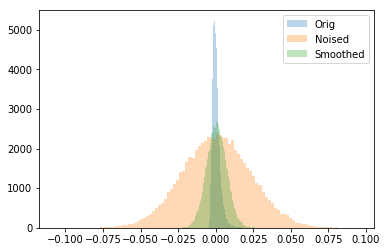

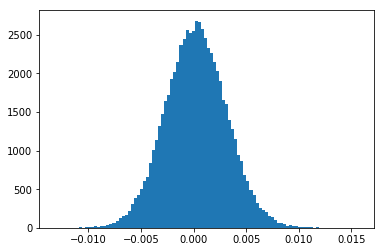

[[0.28113  0.762651]]


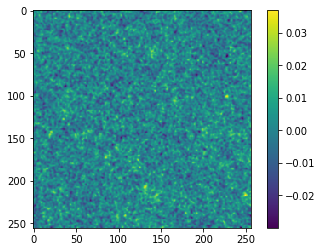

In [64]:
for i, (x,y) in enumerate(orig_train_dset):
    #print x,y
    print y
    im = plt.imshow(x.squeeze())
    plt.colorbar(im)
    plt.show();

    #print x.min(), x.max()
    print 
    if i> -1:
        break

In [36]:
np.random.seed(0)
orig_train_dset = DatasetFromFile(orig_fname,batch_size, shuffle=True, augment=True, train_test_split = 0.3,\
                                 whiten = False, cache_size = 1, data_mod=lambda x:x, transform=transform)
#orig_val_dset = orig_train_dset.get_test_dset()

[[0.28113  0.762651]]


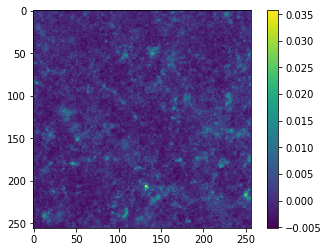

In [37]:
for i, (x,y) in enumerate(orig_train_dset):
    #print x,y
    print y
    im = plt.imshow(x.squeeze())
    plt.colorbar(im)
    plt.show();

    #print x.min(), x.max()
    print 
    if i> -1:
        break